<a href="https://colab.research.google.com/github/HussainPythonista/LinearRegressionModel/blob/main/Boom_Bike_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the **demand for shared bikes** among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the **demand for these shared bikes** depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## My Solution:

This is a pet project,when I read the problem statement,I understand,some of there needs ,they want to know what are feature that affect the demand of bike,So,here explanablity is more important than others.

So,I'm gonna try below algorithms:

**- Normal linear regression**

**- Ridge and lasso regression** 

**- Decision tree**

The above algorithms are good in the terms of explaneblity and it is easy to train as well

## Approach:

- Importing Necessary Libraries and understanding the dataset
- Data cleaning
- EDA
- Model Building
- Model Evaluation


### Importing Necessary Libraries and understanding the dataset

In [410]:
#Import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb


import warnings
warnings.filterwarnings("ignore")

In [411]:
#Loading data from google drive
bike_price=pd.read_csv("/content/drive/MyDrive/ML_Dataset/day.csv")
bike_price.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [412]:
#Checking data shape
bike_price.shape

(730, 16)

The dataset look too small better analyze,here cnt is the column that we want to predict, so cnt is the target column, with the help of other independent column, we need to predict cnt column,here explanablity is more important, so the client wants to understand what are feature help for that number of bike rentals. 

#### Understanding Data

In [413]:
bike_price.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [414]:
#Descriptive Statistics
bike_price.describe(percentiles=[0.75,0.997]).T

,count,mean,std,min,50%,75%,99.7%,max
instant,730.0,365.500000,210.877136,1.000000,365.500000,547.750000,727.813000,730.000000
season,730.0,2.498630,1.110184,1.000000,3.000000,3.000000,4.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.500000,1.000000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,7.000000,10.000000,12.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,1.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,3.000000,5.000000,6.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,1.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,2.000000,3.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,20.465826,26.880615,34.704983,35.328347
atemp,730.0,23.726322,8.150308,3.953480,24.368225,30.445775,40.239797,42.044800


In [415]:
#Understand some basic informaion about dataset
bike_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Changing the target column name from cnt to count for better understanding

In [416]:
##Rename the column
bike_price.rename(columns={"cnt":"count"},inplace=True)

In [417]:
bike_price.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

### Data cleaning

In [418]:
#The instant column is looks like index
bike_price["instant"]

0        1
1        2
2        3
3        4
4        5
      ... 
725    726
726    727
727    728
728    729
729    730
Name: instant, Length: 730, dtype: int64

In [419]:
# Dropping the instant column
bike_price.drop(columns=["instant"],inplace=True)

In [420]:
bike_price.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


**casual and registered**
- casual and registered, the same information is avalible in cnt column,so dropping these column is better idea, 


In [421]:
##dropping the columns casual and registered
bike_price.drop(columns=["casual","registered"],inplace=True)

In [422]:
bike_price

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


**We have date columns, but in other columns contains same infrormation which date column has, so I simply split the date column, and drop the dteday column**

In [423]:
#Spliting the date column, and create new column and store those values in that column
bike_price["date"]=bike_price["dteday"].apply(lambda x:x.split("-")[0])
bike_price["date"]

0      01
1      02
2      03
3      04
4      05
       ..
725    27
726    28
727    29
728    30
729    31
Name: date, Length: 730, dtype: object

In [424]:
#Dropping the "dteday" column
bike_price.drop(columns=["dteday"],inplace=True)

In [425]:
bike_price

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count,date
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,01
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,02
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,03
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,04
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,27
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,28
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,29
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,30


In [426]:
bike_price.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
count         0
date          0
dtype: int64

The dataset looks quite good, so I'm gonna jump into EDA part, The most interesting part which will help us to understand lot of insights.

## EDA

Here I'm gonna create new dataset for change some of the values in dataset, for understang something clear about data

#### Create specific dataset for EDA 

- Because, we need to change some of the values for our understanding in categorical value, while building model we have to create new variables as dummy, and it might be affect parent data information as well, so better creating new dataset is good idea

In [427]:
#Creating new dataset
Bike_Data_EDA=bike_price.copy()

In [428]:
#Assign values in dictionary format
values={1:"spring", 2:"summer", 3:"fall", 4:"winter"}

# Gathering name of season from dictionary and assign to new variables
Bike_Data_EDA["season"]=Bike_Data_EDA["season"].apply(lambda x:values[x])
Bike_Data_EDA


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count,date
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,01
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,02
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,03
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,04
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,27
726,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,28
727,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,29
728,spring,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,30


In [429]:
#Create the year dictionary for assigning values
year={0: 2018, 1:2019}

# Gathering name of season from dictionary and assign to new variables
Bike_Data_EDA["yr"]=Bike_Data_EDA["yr"].apply(lambda x:year[x])
Bike_Data_EDA



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count,date
0,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,01
1,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,02
2,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,03
3,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,04
4,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,27
726,spring,2019,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,28
727,spring,2019,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,29
728,spring,2019,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,30


In [430]:

#Create the year dictionary for assigning values
holiday={0: "Holiday", 1:"Working_day"}

# Gathering name of season from dictionary and assign to new variables
Bike_Data_EDA["workingday"]=Bike_Data_EDA["workingday"].apply(lambda x:holiday[x])
Bike_Data_EDA


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count,date
0,spring,2018,1,0,6,Holiday,2,14.110847,18.18125,80.5833,10.749882,985,01
1,spring,2018,1,0,0,Holiday,2,14.902598,17.68695,69.6087,16.652113,801,02
2,spring,2018,1,0,1,Working_day,1,8.050924,9.47025,43.7273,16.636703,1349,03
3,spring,2018,1,0,2,Working_day,1,8.200000,10.60610,59.0435,10.739832,1562,04
4,spring,2018,1,0,3,Working_day,1,9.305237,11.46350,43.6957,12.522300,1600,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,0,4,Working_day,2,10.420847,11.33210,65.2917,23.458911,2114,27
726,spring,2019,12,0,5,Working_day,2,10.386653,12.75230,59.0000,10.416557,3095,28
727,spring,2019,12,0,6,Holiday,2,10.386653,12.12000,75.2917,8.333661,1341,29
728,spring,2019,12,0,0,Holiday,1,10.489153,11.58500,48.3333,23.500518,1796,30


In [431]:

#Create the year dictionary for assigning values
national_holiday={0: "No_National_holiday ", 1:"National_holiday"}

# Gathering name of season from dictionary and assign to new variables
Bike_Data_EDA["holiday"]=Bike_Data_EDA["holiday"].apply(lambda x:holiday[x])
Bike_Data_EDA


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count,date
0,spring,2018,1,Holiday,6,Holiday,2,14.110847,18.18125,80.5833,10.749882,985,01
1,spring,2018,1,Holiday,0,Holiday,2,14.902598,17.68695,69.6087,16.652113,801,02
2,spring,2018,1,Holiday,1,Working_day,1,8.050924,9.47025,43.7273,16.636703,1349,03
3,spring,2018,1,Holiday,2,Working_day,1,8.200000,10.60610,59.0435,10.739832,1562,04
4,spring,2018,1,Holiday,3,Working_day,1,9.305237,11.46350,43.6957,12.522300,1600,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,Holiday,4,Working_day,2,10.420847,11.33210,65.2917,23.458911,2114,27
726,spring,2019,12,Holiday,5,Working_day,2,10.386653,12.75230,59.0000,10.416557,3095,28
727,spring,2019,12,Holiday,6,Holiday,2,10.386653,12.12000,75.2917,8.333661,1341,29
728,spring,2019,12,Holiday,0,Holiday,1,10.489153,11.58500,48.3333,23.500518,1796,30


Creating bucket based on dates for better understanding of bike rentals

In [432]:
def bucket_date(date):
  #This function returns date bucket based on the date of that day
  date=int(date)
  if date<=7:
    return "Month starting"

  elif  date<=15 and date>7:
    return "First mid-month"

  elif  date>15 and date<=21:

    return "Second mid-month"
  
  else: 
    return "month-end"

#Creating new columns using apply build in function 
Bike_Data_EDA['date']=Bike_Data_EDA['date'].apply(lambda x:bucket_date(x))

In [433]:
#Here after there is no use of date column, so better droping this
Bike_Data_EDA.drop(columns="date",inplace=True)

In [434]:
Bike_Data_EDA

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,spring,2018,1,Holiday,6,Holiday,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,Holiday,0,Holiday,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,Holiday,1,Working_day,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,Holiday,2,Working_day,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,Holiday,3,Working_day,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,Holiday,4,Working_day,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,12,Holiday,5,Working_day,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,12,Holiday,6,Holiday,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,12,Holiday,0,Holiday,1,10.489153,11.58500,48.3333,23.500518,1796


**Creating monthly columns**

#### Plotting the data

- Lets jump into most interesting and most crucial part of model building eda.

Create Functions for follow **DRY** Principle

In [435]:
#For creating barplot
def create_bar_plot(x,y=Bike_Data_EDA["count"]):
    # Changing the figure size
    plt.figure(figsize=(8,8))
    # Plot the count of cycles
    sb.barplot(Bike_Data_EDA[x],y,palette="rocket")
    plt.show()

In [436]:
def create_bar_plot_monthhue(x,hue,y=Bike_Data_EDA["count"]):
    # Changing the figure size
    plt.figure(figsize=(20,8))
    # Plot the count of cycles
    sb.barplot(Bike_Data_EDA[x],y,hue=Bike_Data_EDA[hue],palette="tab10")
    plt.show()

##### Year wise sales

In [437]:
Bike_Data_EDA["yr"].unique()

array([2018, 2019])

In [438]:
year_sales=pd.pivot_table(data=Bike_Data_EDA,values="count",index="yr",aggfunc=np.sum)
year_sales

,count
yr,
2018,1243103
2019,2047742


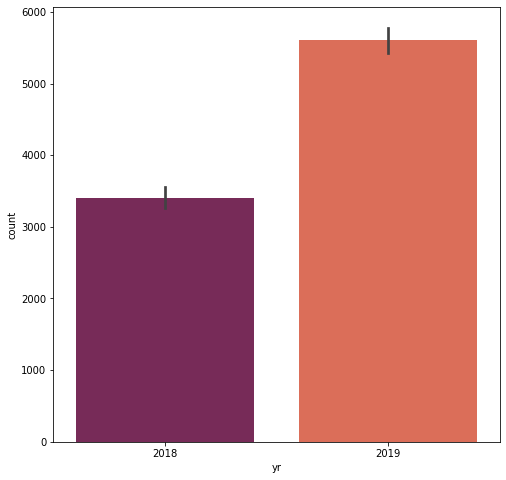

In [439]:
create_bar_plot("yr")

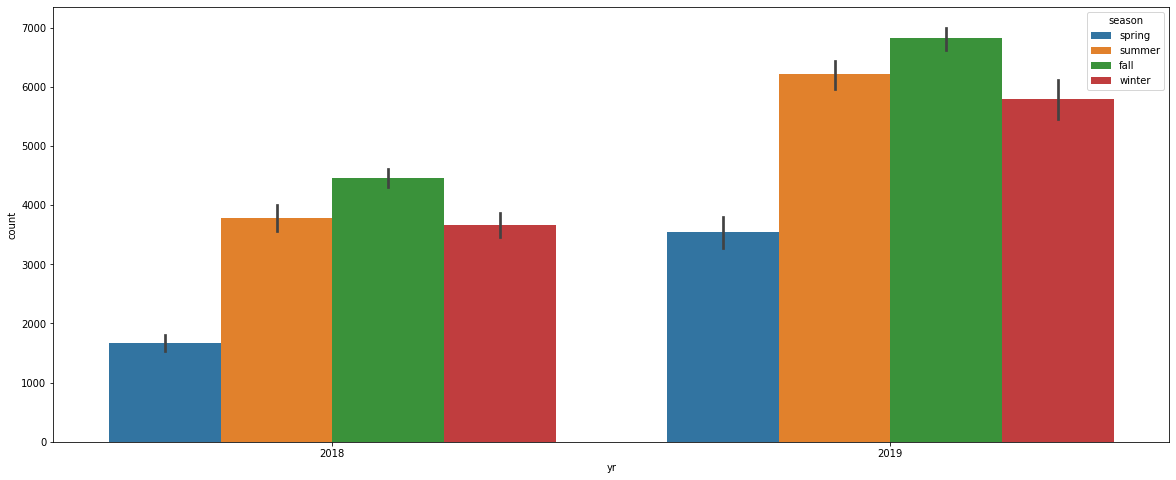

In [440]:
# Plotting the columns
create_bar_plot_monthhue("yr","season")

In [441]:
#Some basic understanding about number of cycle give for rental in both 2018 and 2019 

#pecentage of cycle give for rental in 2018, that is total contribution in toal bike rental

Total=(2047742+1243103)
print("Total percentage of rental in 2018 :",(1243103/Total)*100)

print("Total percentage of rental in 2019 :",(2047742/Total)*100)

print("Percentage of increase from one year to another:",((2047742-1243103)/1243103)*100)


Total percentage of rental in 2018 : 37.774583731534
Total percentage of rental in 2019 : 62.225416268466006
Percentage of increase from one year to another: 64.72826467316062


**Insights:**

- We can clearly see that there is huge diiference between year 2018 and 2019 in Average Sales.
- 38% of total sales happened in 2018, but in 2019 the total sales is 62%,which is huge.
- We ensure that there is huge increase in sales which is nearly 65%.
- While checking with seasons, i can underestand spring season has very less rentals.

**Assumption:**

- Because in 2018 they start the company, every company get less sale on initial position but based on that lesson's, we expand our bussiness on 2019, because of that we get this much of sales in 2019 

##### Holiday vs Non-Holiday

In [442]:
Bike_Data_EDA["workingday"].unique()

array(['Holiday', 'Working_day'], dtype=object)

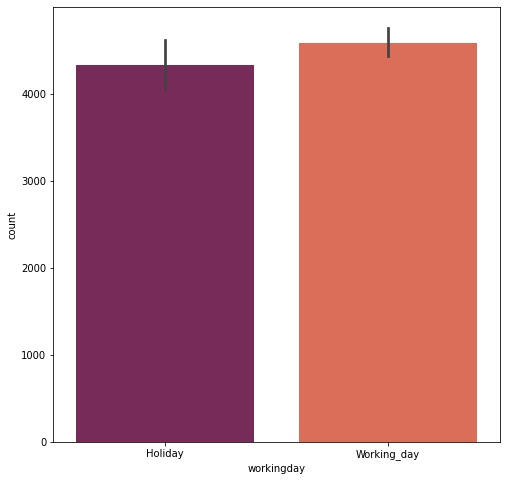

In [443]:
create_bar_plot("workingday")

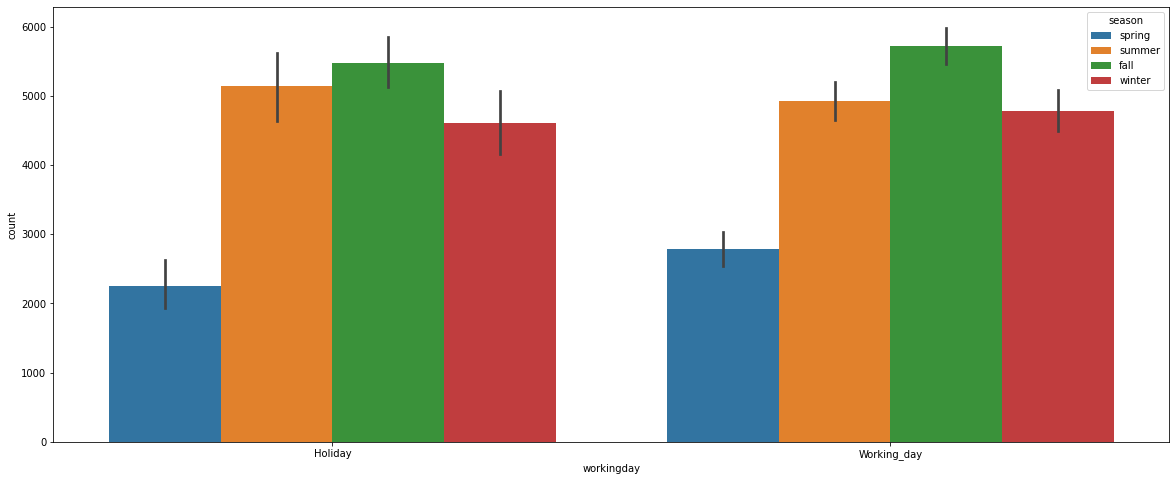

In [444]:
# Plotting the columns
create_bar_plot_monthhue("workingday","season")

**Checking on pivots**

In [445]:
workingDay_sales=pd.pivot_table(data=Bike_Data_EDA,values="count",index="workingday",aggfunc=np.sum)
workingDay_sales

,count
workingday,
Holiday,1000269
Working_day,2290576


In [446]:
workingDay_sales=pd.pivot_table(data=Bike_Data_EDA,values="count",index="workingday",aggfunc="mean")
workingDay_sales

,count
workingday,
Holiday,4330.168831
Working_day,4590.332665


**Insights:**

- While checking the barplot of holiday and working day, there is no much difference in sales in both holiday and working day,because working day has just 200 away from holiday, this is not an big difference,**So,I declare this is not that much difference**

- While checking the total rental sales of bikes, there is 2x of rentals is moe than the Working_day,but we can't say this is huge because, weekday has 5 days but weekend has only 2 days.

- Like Year wise, here working days wise as well the season spring has very low sale of bikes.

##### Checking on National Holidays

In [447]:
Bike_Data_EDA["holiday"].unique()

array(['Holiday', 'Working_day'], dtype=object)

In [448]:
workingDay_sales=pd.pivot_table(data=Bike_Data_EDA,values="count",index="holiday",aggfunc=np.sum)
workingDay_sales

,count
holiday,
Holiday,3212410
Working_day,78435


In [449]:
workingDay_sales_avg=pd.pivot_table(data=Bike_Data_EDA,values="count",index="holiday",aggfunc="mean")
workingDay_sales_avg

,count
holiday,
Holiday,4530.90268
Working_day,3735.00000


In [450]:
total_diff=(workingDay_sales_avg.loc["Holiday"]-workingDay_sales_avg.loc["Working_day"])
print("The average ddifference between the holidays and workingdays",total_diff/workingDay_sales_avg.loc["Working_day"])

The average ddifference between the holidays and workingdays count    0.213093
dtype: float64


In [451]:
Bike_Data_EDA['holiday'].value_counts()

Holiday        709
Working_day     21
Name: holiday, dtype: int64

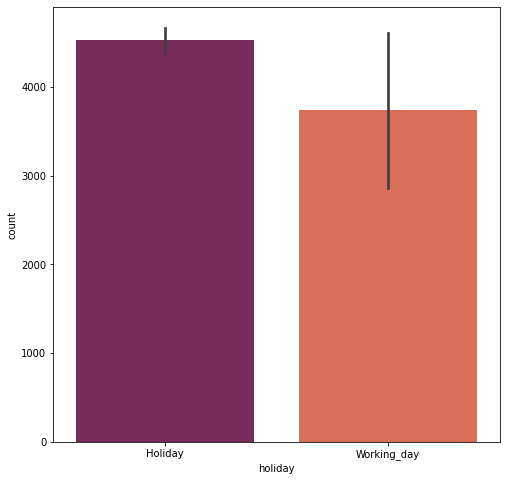

In [452]:
create_bar_plot("holiday")

**Insights:**
- We can clearly see that there is only 21 national holidays in USA, but in overall rental is good even better than worrking or other holidays.
- While compare it with other average increase the average rental of bikes which is 21% higher than normal days

**Decision:**
- We should give more focus on holidays seasons for introducing new products, tie-up with other comapanies advertaisement and more. 

##### Rentels on season's

While checking the season as hue I found those follow same trent,hear I'm going to elabrate the season wise sales.

In [453]:
Bike_Data_EDA

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,spring,2018,1,Holiday,6,Holiday,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,Holiday,0,Holiday,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,Holiday,1,Working_day,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,Holiday,2,Working_day,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,Holiday,3,Working_day,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,Holiday,4,Working_day,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,12,Holiday,5,Working_day,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,12,Holiday,6,Holiday,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,12,Holiday,0,Holiday,1,10.489153,11.58500,48.3333,23.500518,1796


In [454]:
Bike_Data_EDA["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

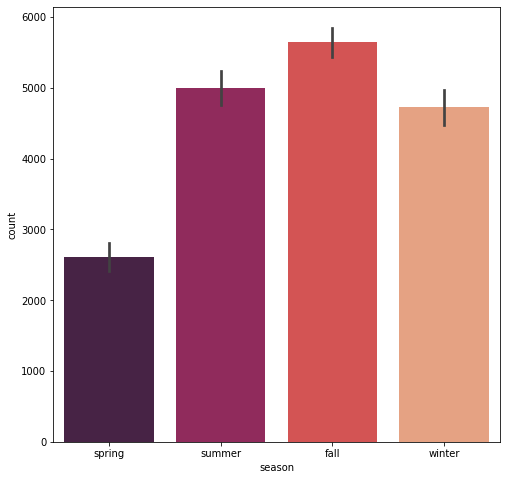

In [455]:
create_bar_plot("season")

In [456]:
seasonwise_sales_avg=pd.pivot_table(data=Bike_Data_EDA,values="count",index="season",aggfunc="mean")
seasonwise_sales_avg

,count
season,
fall,5644.303191
spring,2608.411111
summer,4992.331522
winter,4728.162921


Calculating total percentage of sales in season wise

In [457]:
total_bike_sales=pd.pivot_table(data=Bike_Data_EDA,values="count",index="season",aggfunc="sum")
overall__total_rentals=total_bike_sales["count"].sum()


In [458]:
for season in total_bike_sales.index:
  print(f"Name of Season: {season} \n Total percentage of sales: {(total_bike_sales.loc[season]/overall__total_rentals)*100}")

Name of Season: fall 
 Total percentage of sales: count    32.244879
Name: fall, dtype: float64
Name of Season: spring 
 Total percentage of sales: count    14.267278
Name: spring, dtype: float64
Name of Season: summer 
 Total percentage of sales: count    27.913469
Name: summer, dtype: float64
Name of Season: winter 
 Total percentage of sales: count    25.574374
Name: winter, dtype: float64


**Insights:**

- The season follow same trend like we saw in past
- The spring season has way less sales than other seasons.
- Fall had huge rental sales 
- 32% of total sales happening in Fall season alone,which is big number
- combine of both Winter and Summer season give sales of 52%
- Spring season contributes only 14 percentage

**Decision:**

- **The plot and table information shows the spring season has very less sales which is only 14%, in this season we try to give other promotional offers or do some market campaign and analyze for our future goals**

- **Fall is best season for introduce new product or colabrate with other products to give some promotional offer to improve the rental service, or this is best time for make some temprorly docking station**

In overall Season is most important feature for rentals

##### Weathersit

**Refers to the weather situation**

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [459]:
#Convert the weathersit into string for better understanding or easy to create bar chart
# Bike_Data_EDA.weathersit=str(Bike_Data_EDA.weathersit)
# Bike_Data_EDA.weathersit.unique()

In [460]:
Bike_Data_EDA.weathersit

0      2
1      2
2      1
3      1
4      1
      ..
725    2
726    2
727    2
728    1
729    2
Name: weathersit, Length: 730, dtype: int64

In [461]:
weather_avg=pd.pivot_table(data=Bike_Data_EDA,values="count",index="weathersit",aggfunc="mean")
weather_avg

,count
weathersit,
1,4876.786177
2,4044.813008
3,1803.285714


In [462]:
weather_sum=pd.pivot_table(data=Bike_Data_EDA,values="count",index="weathersit",aggfunc="sum")
weather_sum

,count
weathersit,
1,2257952
2,995024
3,37869


In [463]:
(995024-37869)/37869

25.275423169346958

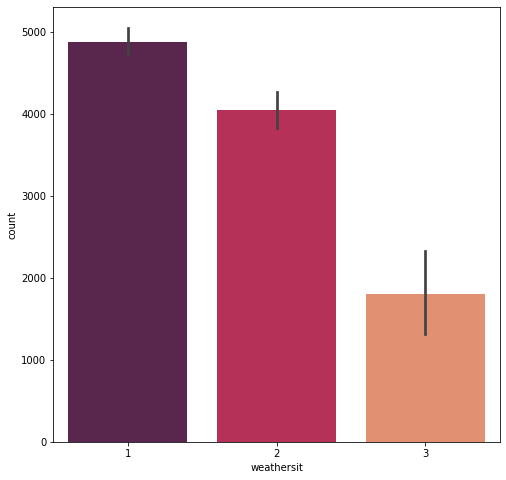

In [464]:
#Bar chart for weathersit vs count
create_bar_plot("weathersit")

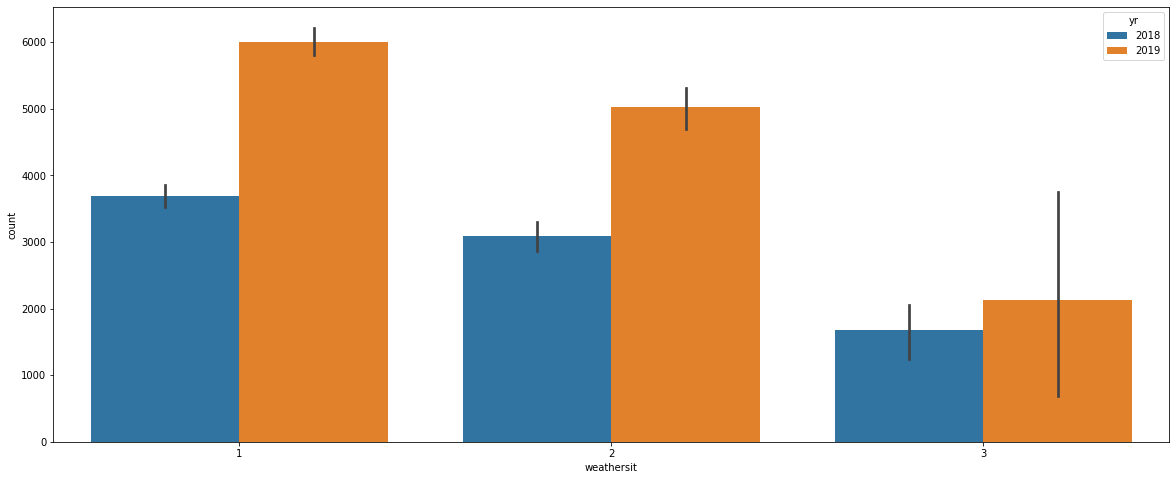

In [465]:
create_bar_plot_monthhue("weathersit","yr")

**Insights:**

- In the first plot we can see that when we have **Clear, Few clouds, Partly cloudy, Partly cloudy**, climate out sales are very good.

- When we have **Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist**, in that wheather as well our sales is very good.

- In Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds type of weather we can see that less number of rental bike sales, this happening because only some of peoples will enjoy the bicycle raid, while we have less rain or snow. At the same time we can see that there is huge difference between Light snow weather sales to Mist or cloudy weather

- Weather type 2 has 25 times higher bike sales then weather type 3.

- When we have Light Snow, Light Rain + Thunderstorm + Scattered clouds type of climate we reduce the number of bike, while we have these type of climate we can take back some of the cycles and do some repair work, or we can do tech update as well.

- There is no information about Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, type of weather, while there is heavy rain we don't expect someone take bi-cycle and roam aroud.

In [466]:
Bike_Data_EDA

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,spring,2018,1,Holiday,6,Holiday,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,Holiday,0,Holiday,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,Holiday,1,Working_day,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,Holiday,2,Working_day,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,Holiday,3,Working_day,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,Holiday,4,Working_day,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,12,Holiday,5,Working_day,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,12,Holiday,6,Holiday,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,12,Holiday,0,Holiday,1,10.489153,11.58500,48.3333,23.500518,1796


##### Checking on month data

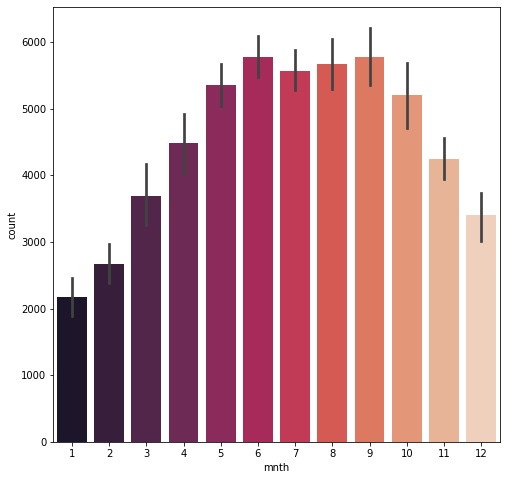

In [467]:
create_bar_plot("mnth")

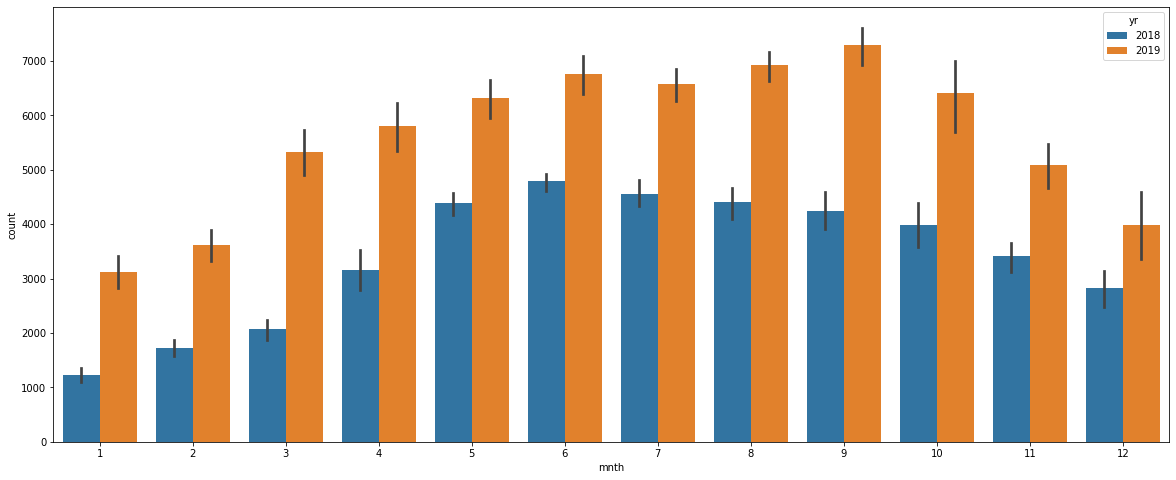

In [468]:
create_bar_plot_monthhue("mnth","yr")

**Insights:**


While checking the montn and compare it with yearly trend, each month sales are improve nearly 30% than previous years same month,so we can declare our sales are increased

In [469]:
#Checking the same seasons with holiday Sales in stacked Bar graph
groupedData = Bike_Data_EDA.groupby(by = ['mnth','yr'])['count'].sum()
groupedData = groupedData.unstack()

per_diff=((groupedData[2019]-groupedData[2018])/groupedData[2019])*100
groupedData["Per_Diff"]=per_diff

groupedData

yr,2018,2019,Per_Diff
mnth,,,
1,38189,96744,60.525717
2,48215,101303,52.405161
3,64045,164875,61.155421
4,94870,174224,45.547112
5,135821,195865,30.655809
6,143512,202830,29.245181
7,141341,203607,30.581463
8,136691,214503,36.275483
9,127418,218573,41.704602


- **First four months our growth of same month in last year than this year is more than 50%** 

- **other moth also increase nearly 30 per than previous year's same month**

- Our monthly sales also looks like normal distribution, mid months are having better sales than starting months and ending months.

#### Take look on Numerical Data


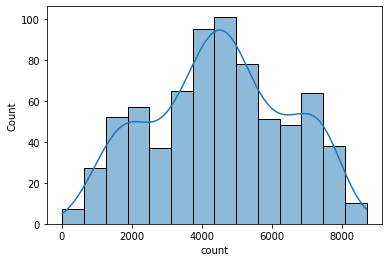

In [470]:
sb.histplot(Bike_Data_EDA["count"], kde=True)

**The data is normally distributed, not that much, the most of the points are away from the mean, it follow normal distribution,So it is way easy to infer the results and creating linear regression as well**

In [471]:
Bike_Data_EDA

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,spring,2018,1,Holiday,6,Holiday,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,Holiday,0,Holiday,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,Holiday,1,Working_day,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,Holiday,2,Working_day,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,Holiday,3,Working_day,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,Holiday,4,Working_day,2,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,12,Holiday,5,Working_day,2,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,12,Holiday,6,Holiday,2,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,12,Holiday,0,Holiday,1,10.489153,11.58500,48.3333,23.500518,1796


##### Pairplot for numerical values

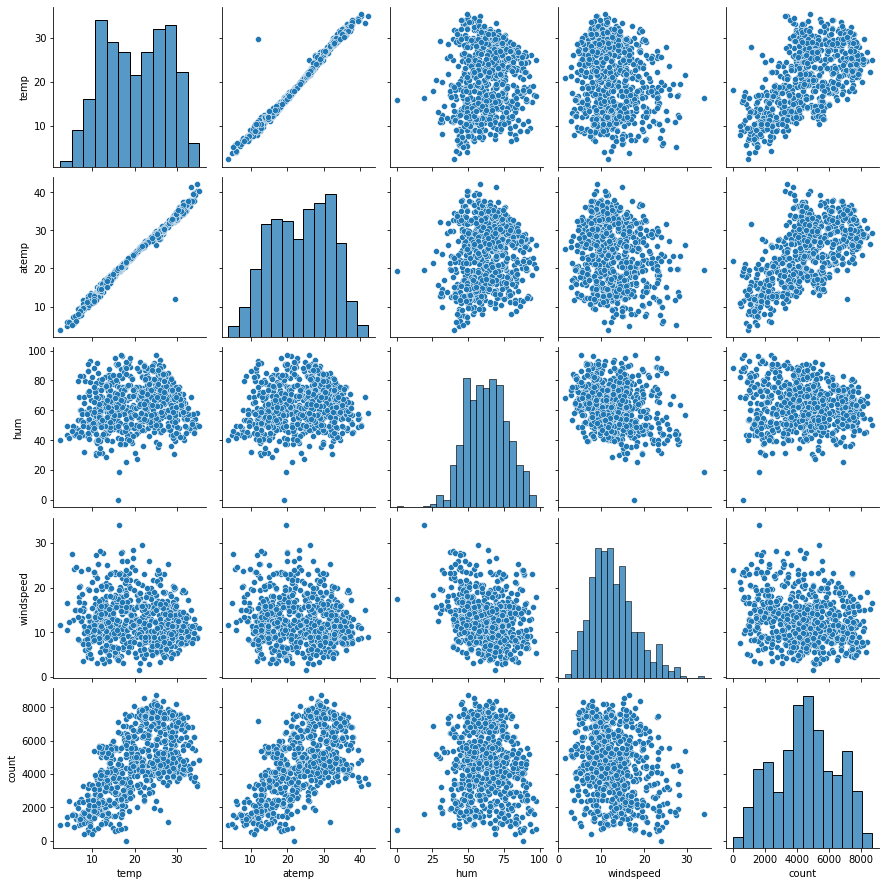

In [472]:
sb.pairplot(Bike_Data_EDA[["temp","atemp","hum","windspeed","count"]])

**Insignts:**

- While checking the pairplot we can infer some of the intitution,Tempreature and feeling temperature are highly co-related, which makes sense whenever the temperature is in minus, the feels like tempreature also lowere than minus

- At the same time tempreature and Feels like tempreature are also contribute for this much of rentals.

- Every numerical values are follow normal distibtion, except windspeed which is right skewed, which means it has outliers, we can see this in Box plot better understanding.


##### Boxplot 

**In this step I'm gonna deal with outliers**

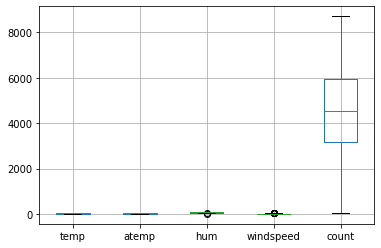

In [473]:
Bike_Data_EDA[["temp","atemp","hum","windspeed","count"]].boxplot()

**The above plot didn't gave much details about numerical data, So i go for a subplot to visualize clearly**

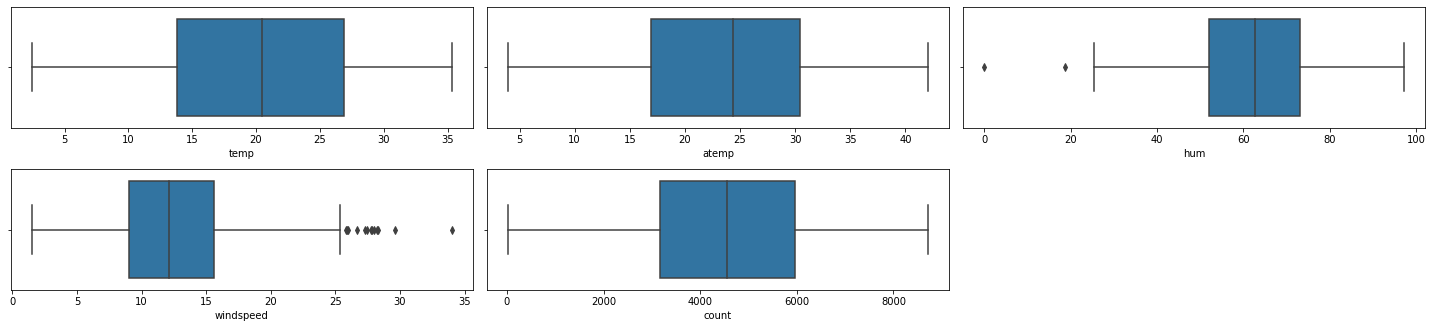

In [474]:
column=["temp","atemp","hum","windspeed","count"]
fig=plt.subplots(figsize=(20, 20))

for i, feature in enumerate(column):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    #sb.boxplot(Dataset[feature], Dataset['SalePrice'])
    sb.boxplot(Bike_Data_EDA[feature])
    plt.tight_layout()

**Insights:**

- While checking the above plot, we can ensure that the variables like windspeed and hum have some outliers

**Decision:**

- Dropping these valuse is not a wise decision because, the length of data is verylittle, so Capping the values is wise decision.



In [475]:
def handling_outliers(data_point,column_name): 
  ##Median of the variables
  Median=Bike_Data_EDA[column_name].median()

  #Higher quartile and lower quartile
  Q3=Bike_Data_EDA[column_name].quantile(0.75)
  Q1=Bike_Data_EDA[column_name].quantile(0.25)

  #IQR Range
  IQR=Q3-Q1

  #upper fince and lower fince
  lowerFince=Q1-1.5*IQR
  upperFince=Q3+1.5*IQR

  if data_point>upperFince:
    return upperFince
  elif data_point<lowerFince:
    return lowerFince
  else:
    return data_point


In [476]:
#Hanling the outliers of values 

# I assign values in parent dataset
bike_price["windspeed"]=bike_price["windspeed"].apply(lambda x:handling_outliers(x,"windspeed"))
bike_price["hum"]=bike_price["hum"].apply(lambda x:handling_outliers(x,"hum"))

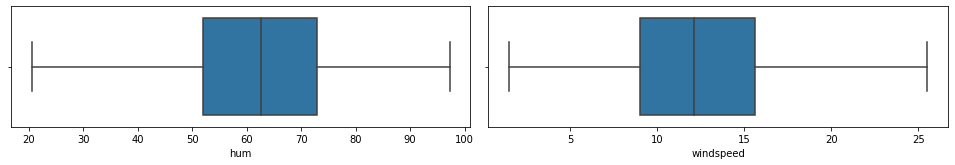

In [477]:
column=["hum","windspeed"]
fig=plt.subplots(figsize=(20, 20))

for i, feature in enumerate(column):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    #sb.boxplot(Dataset[feature], Dataset['SalePrice'])
    sb.boxplot(bike_price[feature])
    plt.tight_layout()

**Everything Looks fine,So I'm going to begin my next step,ie.Model building**

## Model Pre-Processing

- Creating dummy variables
- Checking Multicollinearity or co-relation between independent variables
- Before building model,mostly linear model we should standarize the values, that only fasten our gradient decent algorithm
- Change the distribution of target variable, if not follow normal distribution


In [478]:
bike_price

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count,date
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,01
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,02
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,03
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,04
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,27
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,28
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,29
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,30


#### Creating Dummy variables

- We might think our variables are already in numerical format,why we want to create dummy variable from that
  
    **The answers is:** The model will think december month has more weightage than january because the value for december is 12 and value for january is 1,it will act like Ordinal variable, so better create dummy variable to rectif this problem.

While checking date column it also values are range between 0-31, it is also act like ordinal values, so we create dummy variable from it.

But creating 31 new columns is waste of memory, so I'm going to create bucket of dates for better understanding and easy to create dummy variables as well 

In [479]:
def bucket_date(date):
  #This function returns date bucket based on the date of that day
  date=int(date)
  if date<=7:
    return "Month starting"

  elif  date<=15 and date>7:
    return "First mid-month"

  elif  date>15 and date<=21:

    return "Second mid-month"
  
  else: 
    return "month-end"

#Creating new columns using apply build in function 
bike_price['date']=bike_price['date'].apply(lambda x:bucket_date(x))

In [480]:
#Taking categorical variable
categorical_variables=["season","yr","mnth","holiday","weekday","workingday","weathersit","date"]
categorical_variables

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'date']

In [481]:
#Convert numerical values into categorical values to create dummy
bike_price[categorical_variables]=bike_price[categorical_variables].astype("object")

#Create dummies for categorical variables
categorical_dummies=pd.get_dummies(bike_price[categorical_variables],drop_first=True)

#Concatenate the dummies and master data
bike_price=pd.concat([bike_price,categorical_dummies],axis=1)

#Dropping the created columns
bike_price.drop(columns=["season","yr","mnth","holiday","weekday","workingday","weathersit","date"],inplace=True)

In [482]:
bike_price

,temp,atemp,hum,windspeed,count,season_2,season_3,season_4,yr_1,mnth_2,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,date_Month starting,date_Second mid-month,date_month-end
0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
726,10.386653,12.75230,59.0000,10.416557,3095,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,1
727,10.386653,12.12000,75.2917,8.333661,1341,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
728,10.489153,11.58500,48.3333,23.500518,1796,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


#### Checking Multicollinearity

- Multicollinearity is serious issue while building linear model, because the in linear regression assume while predict with specific columns other columns are constant, but in this case of multicollinearity
the situation is different,the columns are not act as constant it will other columns are also change if specific column change little bit, so multicollinearity is huge problem in linear regression. 

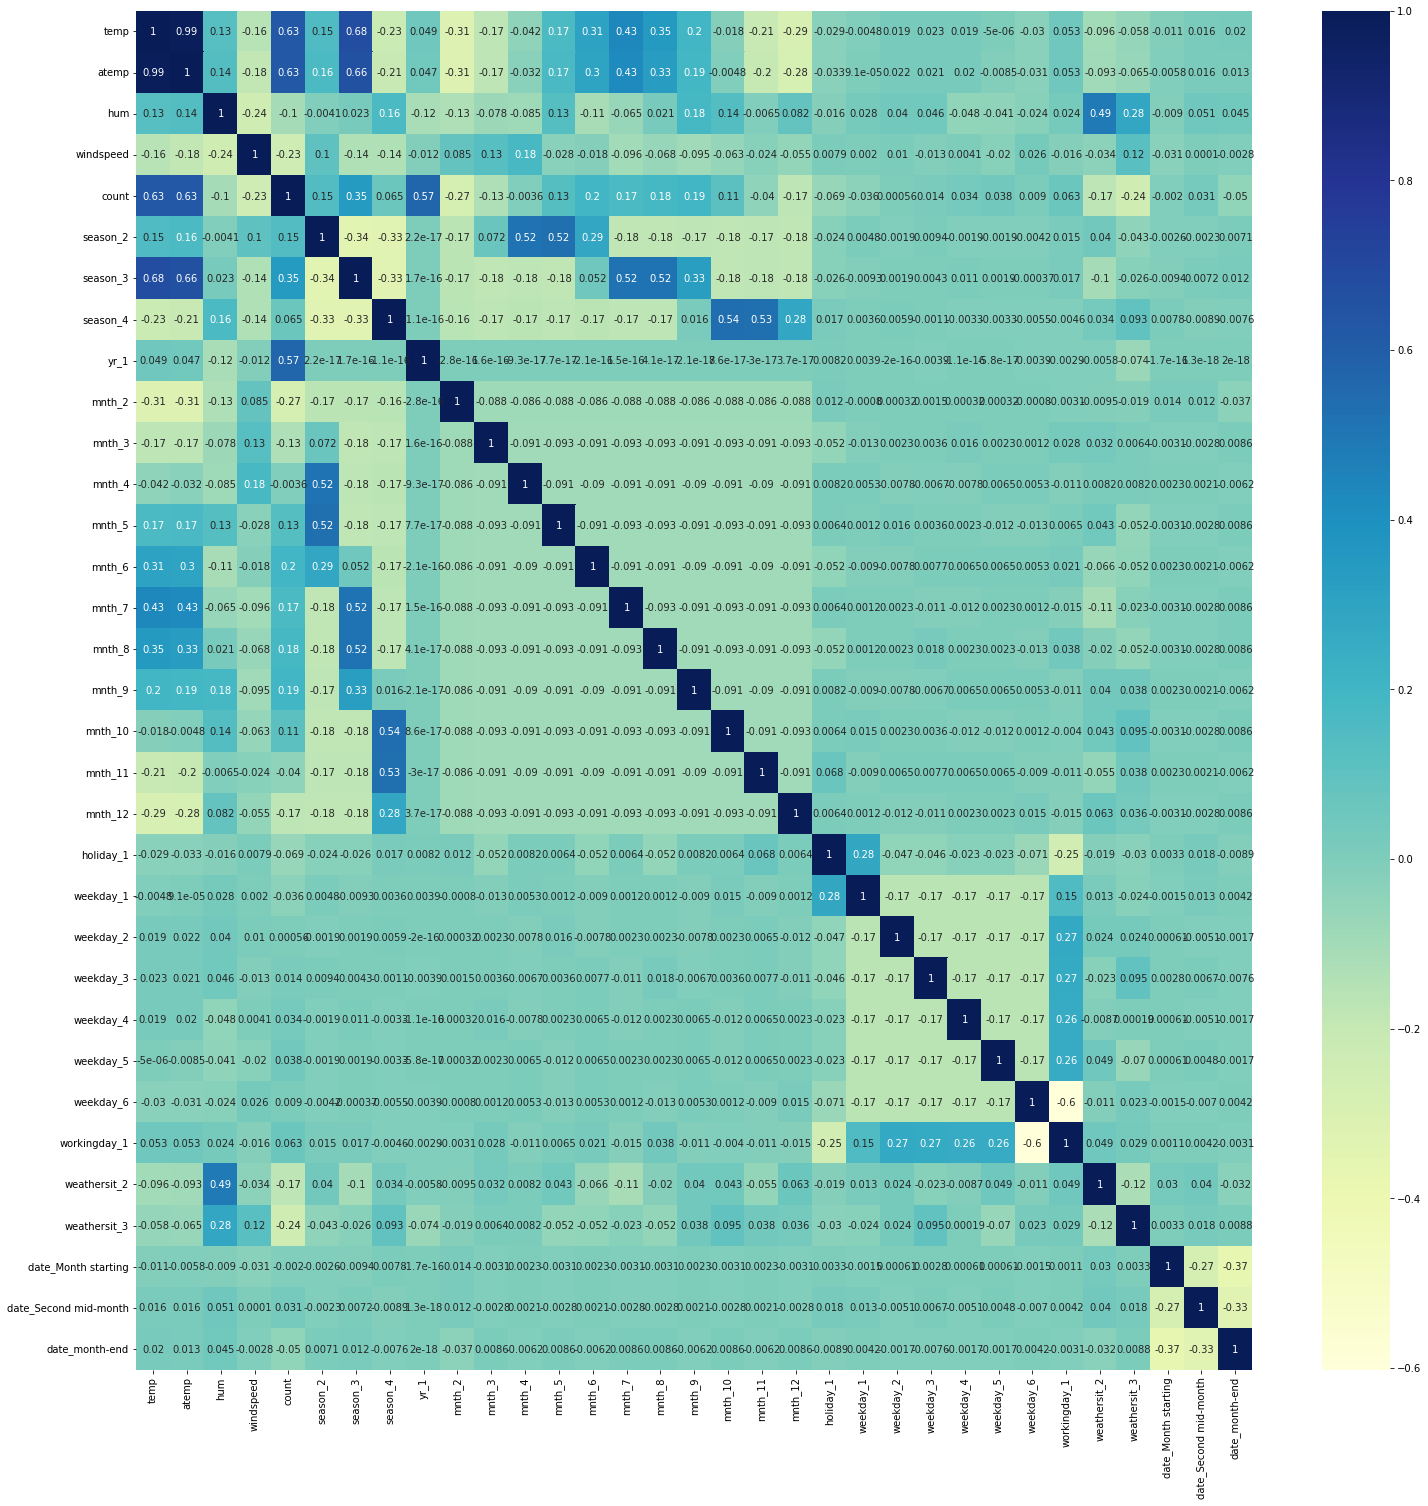

In [483]:


#Drawing the Heatmap to find co-relation coefficient
plt.figure(figsize = (25,25))
sb.heatmap(bike_price.corr(), annot = True, cmap="YlGnBu")
plt.show()

Column atemp and temp are highly co-related so better drop either one,so I'm gonna drop temp column

In [484]:
#Dropping temp column
bike_price.drop(columns="temp",inplace=True)

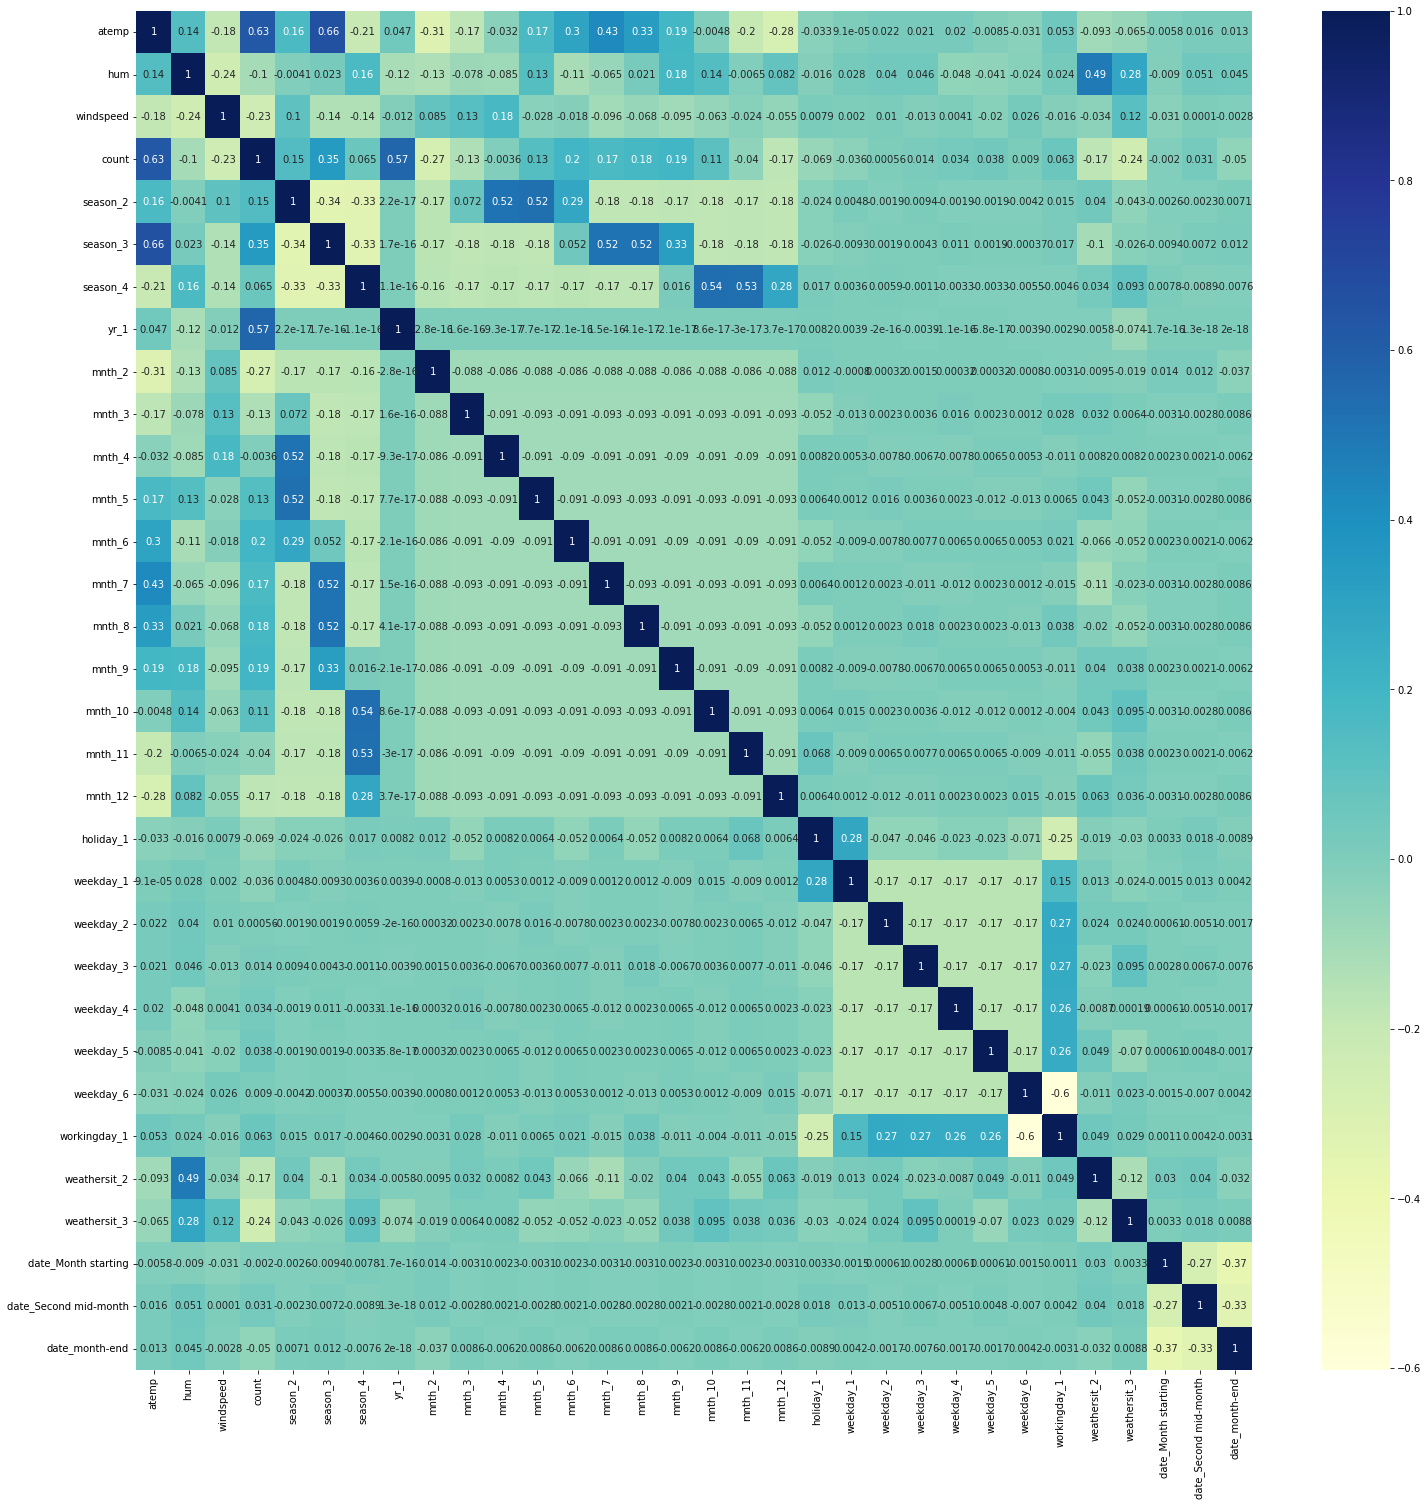

In [485]:


#Drawing the Heatmap to find co-relation coefficient
plt.figure(figsize = (25,25))
sb.heatmap(bike_price.corr(), annot = True, cmap="YlGnBu")
plt.show()

Some of the columns are good amount of corelation,but not that much we can hadle those while go with flow. 

#### Feature Scaling

**Scaling the dependent variable helps in achieving convergence faster and can lead to better model performance. It also helps in bringing all the features to the same scale, which is important in linear regression as the scale of the features can affect the magnitude of the coefficients and hence the predictions made by the model.**

In [486]:
from sklearn.preprocessing import MinMaxScaler
#Creating object
scaler=MinMaxScaler()

#Scaler is an object
columns = ['atemp', 'hum', 'windspeed','count']

bike_price[columns] = scaler.fit_transform(bike_price[columns])

In [487]:
bike_price

,atemp,hum,windspeed,count,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,date_Month starting,date_Second mid-month,date_month-end
0,0.373517,0.782800,0.385381,0.110792,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,0.360541,0.639779,0.631295,0.089623,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0.144830,0.302494,0.630653,0.152669,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.174649,0.502094,0.384963,0.177174,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.197158,0.302082,0.459228,0.181546,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0.193709,0.583520,0.914897,0.240681,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1
726,0.230993,0.501527,0.371494,0.353543,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,1
727,0.214393,0.713840,0.284711,0.151749,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
728,0.200348,0.362519,0.916630,0.204096,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [489]:
bike_price.shape

(730, 32)

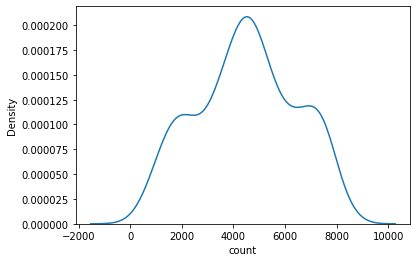

In [492]:
sb.kdeplot(Bike_Data_EDA["count"])

The data looks like normal distribution, so we no need to change or apply log trasformation on target variables.